# Calculate wind speed vectors from the surface stress because wind speeds are only available monthly in the CESM2 single forcing experiments

In [1]:
import xarray as xr
import numpy as np
import cmocean
import matplotlib.pyplot as plt
import glob
import sys
sys.path.append('/home/users/birgal/')
from nemo_python_git.constants import cesm2_ensemble_members, region_names
from nemo_python_git.utils import fix_lon_range
from nemo_python_git.file_io import find_cesm2_file, find_processed_cesm2_file

In [2]:
base_dir = '/gws/nopw/j04/anthrofail/birgal/NEMO_AIS/'

In [3]:
cesm2_folder =f'{base_dir}climate-forcing/CESM2/LE2/'

Load CESM2 files:

In [12]:
# cesm2_landmask = xr.open_dataset(f'{cesm2_folder}b.e21.BHISTsmbb.f09_g17.LE2-1011.001.cam.h0.LANDFRAC.185001-185912.nc').LANDFRAC.isel(time=0)
# cesm2_landmask['lon'] = fix_lon_range(cesm2_landmask['lon'])

In [4]:
taux = xr.open_dataset(f'{cesm2_folder}raw/b.e21.BHISTsmbb.f09_g17.LE2-1011.001.cam.h1.TAUX.18500101-18591231.nc').sel(lat=slice(-90,-50)).isel(time=slice(0,365))
tauy = xr.open_dataset(f'{cesm2_folder}raw/b.e21.BHISTsmbb.f09_g17.LE2-1011.001.cam.h1.TAUY.18500101-18591231.nc').sel(lat=slice(-90,-50)).isel(time=slice(0,365))
u10  = xr.open_dataset(f'{cesm2_folder}raw/b.e21.BHISTsmbb.f09_g17.LE2-1011.001.cam.h1.U10.18500101-18591231.nc').sel(lat=slice(-90,-50)).isel(time=slice(0,365))
ubot = xr.open_dataset(f'{cesm2_folder}raw/b.e21.BHISTsmbb.f09_g17.LE2-1011.001.cam.h1.UBOT.18500101-18591231.nc').sel(lat=slice(-90,-50)).isel(time=slice(0,365))
vbot = xr.open_dataset(f'{cesm2_folder}raw/b.e21.BHISTsmbb.f09_g17.LE2-1011.001.cam.h1.VBOT.18500101-18591231.nc').sel(lat=slice(-90,-50)).isel(time=slice(0,365))
u10x = xr.open_dataset(f'{cesm2_folder}processed/CESM2-LE2_ens1011.001_U10x_y1850.nc').sel(lat=slice(-90,-50))
u10y = xr.open_dataset(f'{cesm2_folder}processed/CESM2-LE2_ens1011.001_U10y_y1850.nc').sel(lat=slice(-90,-50))

$\tau_x = \rho_{air} C_d u^2$

$\tau_y = \rho_{air} C_d v^2$

$\tau_x + \tau_y = (\rho_{air} C_d)(u^2 + v^2)$ $\rightarrow$ $\rho_{air} C_d = \frac{\tau_x + \tau_y}{u^2 + v^2}$

https://www2.cesm.ucar.edu/models/cesm1.0/cam/docs/description/cam5_desc.pdf#page=119.21

But, will this work when it's sea ice covered?

In [16]:
theta = np.arctan2(-1*tauy.TAUY, -1*taux.TAUX)
U10x_est = u10.U10*np.cos(theta)
U10y_est = u10.U10*np.sin(theta)

U10x_est['lon'] = fix_lon_range(U10x_est['lon'])
U10y_est['lon'] = fix_lon_range(U10y_est['lon'])
# constants = (taux.TAUX + tauy.TAUY)/(u10.U10**2)
# Cd = constants/rho_air

# ubot_estimate = np.sqrt(np.abs(taux.TAUX/constants))*np.sign(taux.TAUX)
# vbot_estimate = np.sqrt(np.abs(tauy.TAUY/constants))*np.sign(tauy.TAUY)

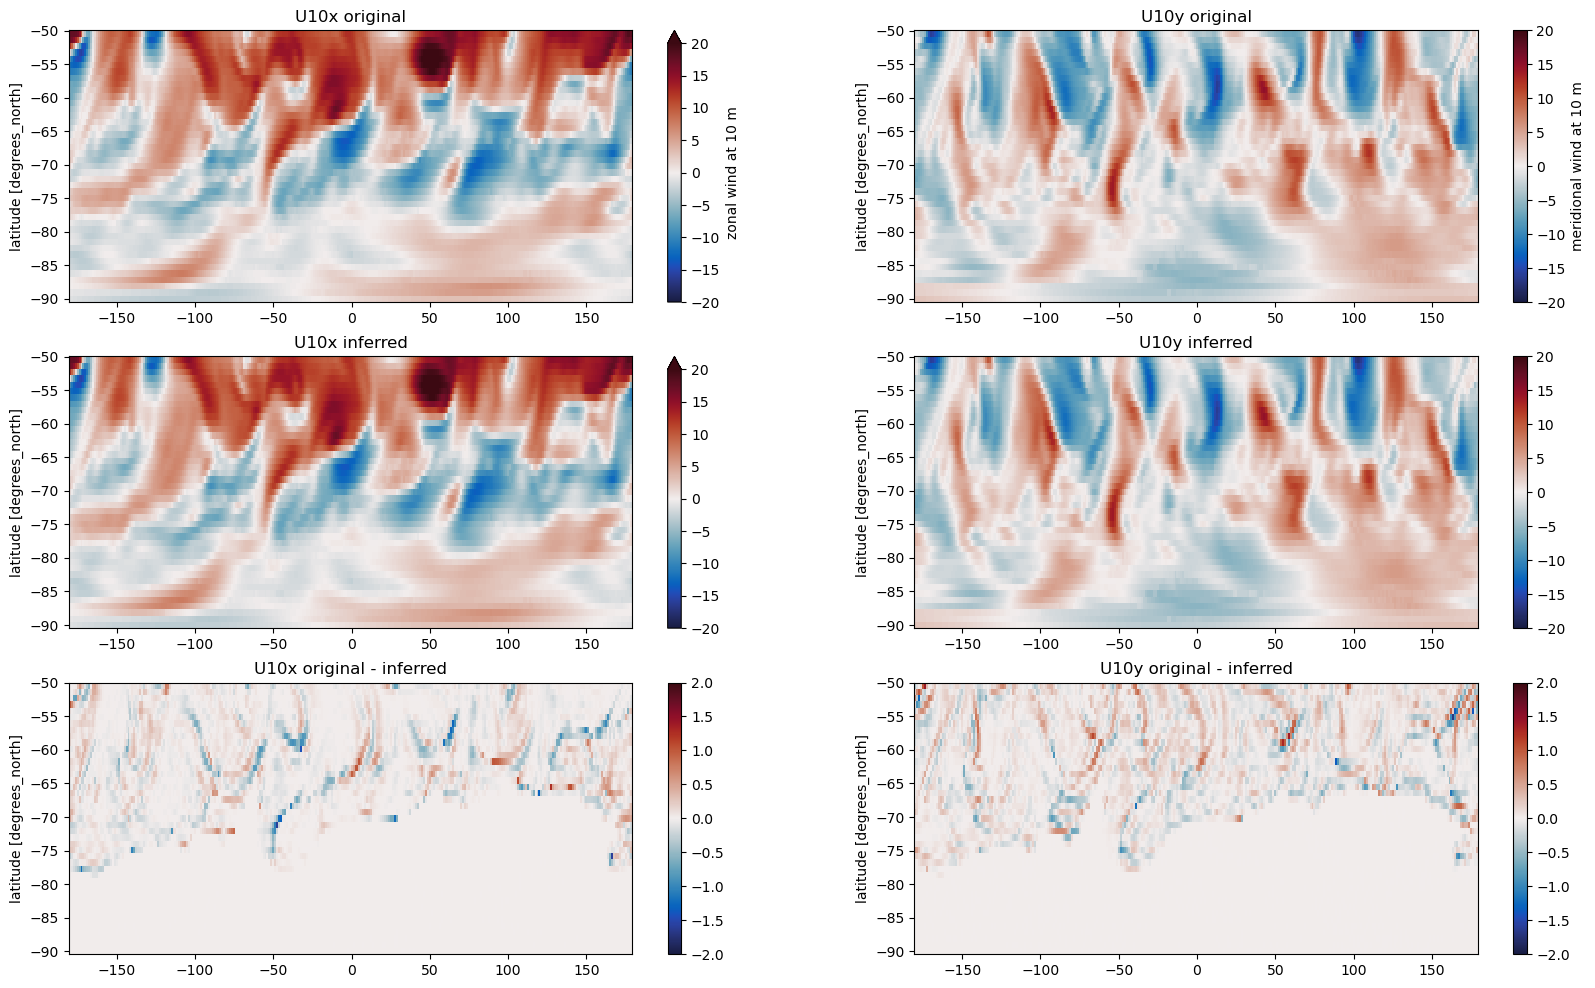

In [18]:
ts=0

fig, ax = plt.subplots(3,2, figsize=(20,12))
u10x.U10x.isel(time=ts).sortby('lon').plot(ax=ax[0,0], vmin=-20, vmax=20, cmap=cmocean.cm.balance)
u10y.U10y.isel(time=ts).sortby('lon').plot(ax=ax[0,1], vmin=-20, vmax=20, cmap=cmocean.cm.balance)
U10x_est.isel(time=ts).sortby('lon').plot(ax=ax[1,0], vmin=-20, vmax=20, cmap=cmocean.cm.balance)
U10y_est.isel(time=ts).sortby('lon').plot(ax=ax[1,1], vmin=-20, vmax=20, cmap=cmocean.cm.balance)
(u10x.U10x.isel(time=ts).sortby('lon') - U10x_est.isel(time=ts).sortby('lon')).plot(ax=ax[2,0], vmin=-2, vmax=2, cmap=cmocean.cm.balance)
(u10y.U10y.isel(time=ts).sortby('lon') - U10y_est.isel(time=ts).sortby('lon')).plot(ax=ax[2,1], vmin=-2, vmax=2, cmap=cmocean.cm.balance)

ax[0,0].set_title('U10x original')
ax[0,1].set_title('U10y original')
ax[1,0].set_title('U10x inferred')
ax[1,1].set_title('U10y inferred')
ax[2,0].set_title('U10x original - inferred')
ax[2,1].set_title('U10y original - inferred')

for axis in ax.ravel():
    axis.set_xlabel('')

In [14]:
find_cesm2_file('LE2', 'TREFHT', 'atm', 'daily', '1011.001', 1850)

'/gws/nopw/j04/anthrofail/birgal/NEMO_AIS/climate-forcing/CESM2/LE2/raw/b.e21.BHISTsmbb.f09_g17.LE2-1011.001.cam.h1.TREFHT.18500101-18591231.nc'

In [15]:
ds1 = xr.open_dataset('/gws/nopw/j04/anthrofail/birgal/NEMO_AIS/climate-forcing/CESM2/LE2/raw/b.e21.BHISTsmbb.f09_g17.LE2-1011.001.cam.h1.TREFHT.18500101-18591231.nc')

In [9]:
ds2 = xr.open_dataset('/gws/nopw/j04/anthrofail/birgal/NEMO_AIS/climate-forcing/CESM2/single-forcing/raw/b.e21.B1850cmip6.f09_g17.CESM2-SF-BMB.001.cam.h1.TREFHT.18500101-18591231.nc')

In [12]:
ds2

<xarray.Dataset> Size: 808MB
Dimensions:       (lat: 192, lon: 288, lev: 32, ilev: 33, time: 3650, nbnd: 2)
Coordinates:
  * lat           (lat) float64 2kB -90.0 -89.06 -88.12 ... 88.12 89.06 90.0
  * lon           (lon) float64 2kB 0.0 1.25 2.5 3.75 ... 356.2 357.5 358.8
  * lev           (lev) float64 256B 3.643 7.595 14.36 ... 957.5 976.3 992.6
  * ilev          (ilev) float64 264B 2.255 5.032 10.16 ... 967.5 985.1 1e+03
  * time          (time) object 29kB 1850-01-01 00:00:00 ... 1859-12-31 00:00:00
Dimensions without coordinates: nbnd
Data variables: (12/26)
    gw            (lat) float64 2kB ...
    hyam          (lev) float64 256B ...
    hybm          (lev) float64 256B ...
    P0            float64 8B ...
    hyai          (ilev) float64 264B ...
    hybi          (ilev) float64 264B ...
    ...            ...
    n2ovmr        (time) float64 29kB ...
    f11vmr        (time) float64 29kB ...
    f12vmr        (time) float64 29kB ...
    sol_tsi       (time) float64 29kB ...
    nsteph        (time) int32 15kB ...
    TREFHT        (time, lat, lon) float32 807MB ...
Attributes:
    Conventions:       CF-1.0
    source:            CAM
    case:              b.e21.B1850cmip6.f09_g17.CESM2-SF-BMB.001
    logname:           cesmsf
    host:              cheyenne4
    initial_file:      b.e21.B1850.f09_g17.CMIP6-piControl.001.cam.i.1001-01-...
    topography_file:   /glade/p/cesmdata/cseg/inputdata/atm/cam/topo/fv_0.9x1...
    model_doi_url:     https://doi.org/10.5065/D67H1H0V
    time_period_freq:  day_1